In [2]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
print(data.head())
print(data.describe())
print(data.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [3]:

import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('diabetes.csv',header=None, names=col_names)
print(data.head())
print(data.describe())
print(data.tail())

      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                   pedigree  age    label  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  
       pregnant glucose   bp skin insulin  bmi pedigree  age label
count       769     769  769  769     769  769      769  769   769
unique       18     137   48   52     187  249      518   53     3
top           1     100   70    0       0   32    0.258   22     0
freq        135      17   57  227  

In [4]:

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('diabetes.csv')  # Make sure this is the correct path

# Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Create and train the model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8181818181818182


In [7]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[95,  7],
       [21, 31]])

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

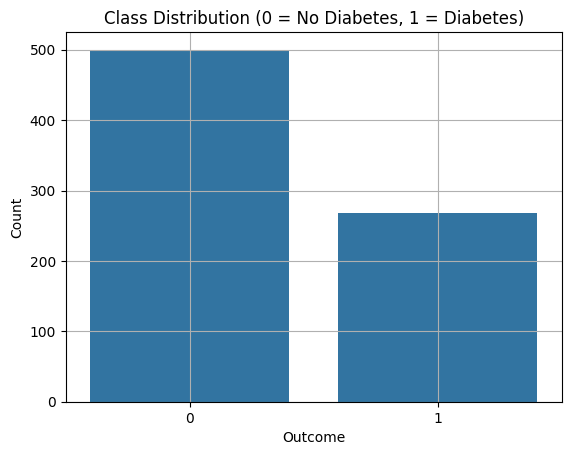

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)

# Step 1: Load the dataset
df = pd.read_csv('diabetes.csv')  # Adjust path if needed

# Step 2: Explore the data
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

# Step 3: Class balance visualization
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()

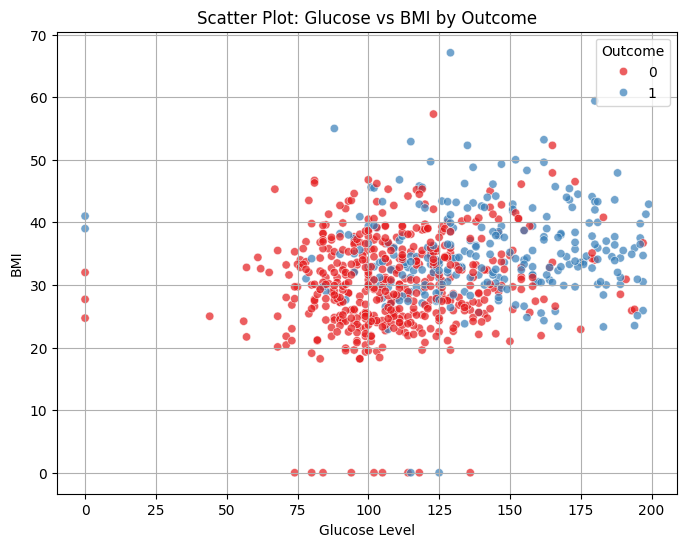

In [9]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (

    confusion_matrix,

    classification_report,

    accuracy_score,

    roc_curve,

    roc_auc_score

)



df = pd.read_csv('diabetes.csv') 



plt.figure(figsize=(8,6))

sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1', alpha=0.7)



plt.title('Scatter Plot: Glucose vs BMI by Outcome')

plt.xlabel('Glucose Level')

plt.ylabel('BMI')

plt.grid(True)

plt.show()

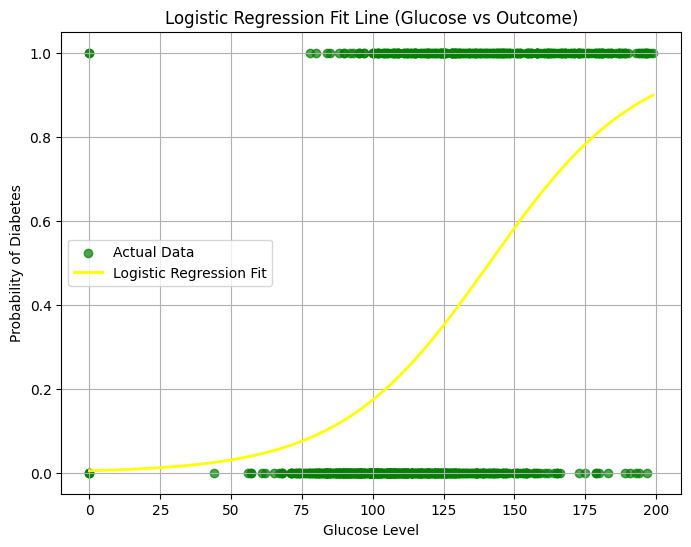

In [10]:
df = pd.read_csv('diabetes.csv')

X = df[['Glucose']].values
y = df['Outcome'].values

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_range)[:, 1]  

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='green', alpha=0.7, label='Actual Data')

plt.plot(X_range, y_prob, color='yellow', linewidth=2, label='Logistic Regression Fit')

plt.title('Logistic Regression Fit Line (Glucose vs Outcome)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\Onkar Gunjal\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


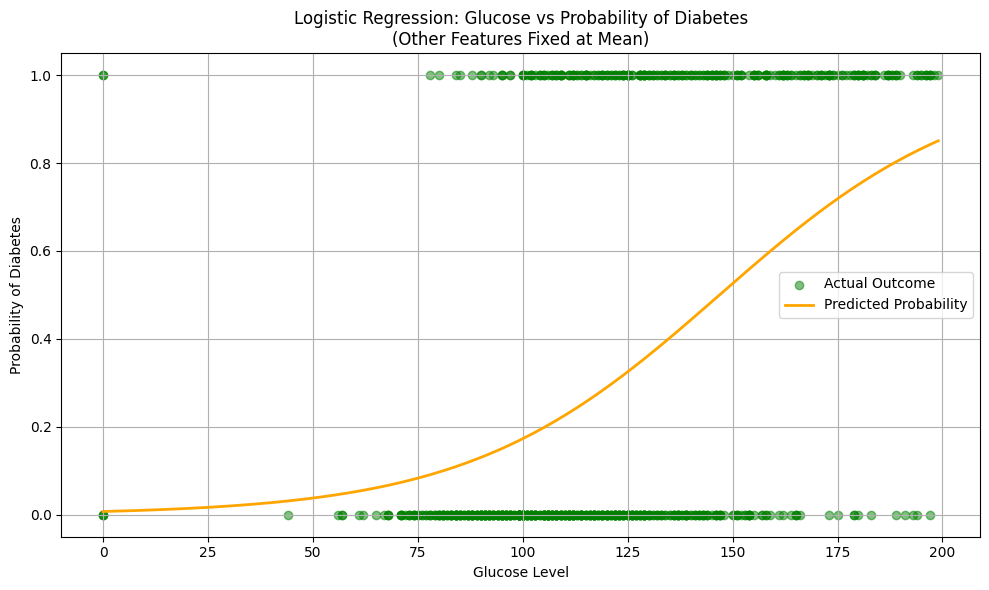

In [12]:

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']
X = df[features].values
y = df['Outcome'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

glucose_range = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 300)
fixed_values = {
    'Pregnancies': df['Pregnancies'].mean(),
    'BloodPressure': df['BloodPressure'].mean(),
    'BMI': df['BMI'].mean(),
    'Age': df['Age'].mean()
}

X_plot = pd.DataFrame({
    'Pregnancies': [fixed_values['Pregnancies']] * len(glucose_range),
    'Glucose': glucose_range,
    'BloodPressure': [fixed_values['BloodPressure']] * len(glucose_range),
    'BMI': [fixed_values['BMI']] * len(glucose_range),
    'Age': [fixed_values['Age']] * len(glucose_range)
})

X_plot_scaled = scaler.transform(X_plot)

y_prob = log_reg.predict_proba(X_plot_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], y, color='green', alpha=0.5, label='Actual Outcome')
plt.plot(glucose_range, y_prob, color='orange', linewidth=2, label='Predicted Probability')

plt.title('Logistic Regression: Glucose vs Probability of Diabetes\n(Other Features Fixed at Mean)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Glucose = 210 --> Probability of Diabetes = 0.9311


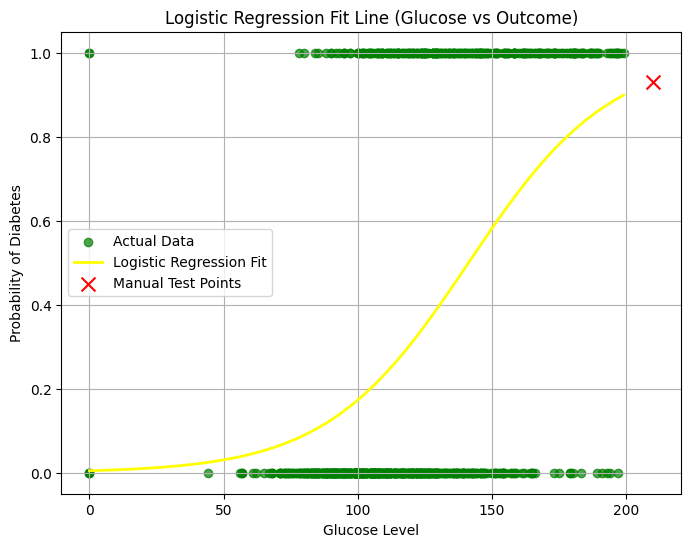

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

X = df[['Glucose']].values
y = df['Outcome'].values


log_reg = LogisticRegression()
log_reg.fit(X, y)


X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_range)[:, 1]


existing_glucose_values = set(X.flatten())
manual_inputs = [92, 115, 130, 145, 160, 175, 190, 210] 
manual_inputs = [val for val in manual_inputs if val not in existing_glucose_values]

X_manual = np.array(manual_inputs).reshape(-1, 1)
y_manual_prob = log_reg.predict_proba(X_manual)[:, 1]


for glucose, prob in zip(manual_inputs, y_manual_prob):
    print(f"Glucose = {glucose} --> Probability of Diabetes = {prob:.4f}")



plt.figure(figsize=(8,6))


plt.scatter(X, y, color='green', alpha=0.7, label='Actual Data')

# Logistic regression curve
plt.plot(X_range, y_prob, color='yellow', linewidth=2, label='Logistic Regression Fit')

# Manual test points
plt.scatter(X_manual, y_manual_prob, color='red', s=100, marker='x', label='Manual Test Points')

plt.title('Logistic Regression Fit Line (Glucose vs Outcome)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')

X = df[['Glucose']].values
y = df['Outcome'].values

log_reg = LogisticRegression()
log_reg.fit(X, y)


x_test = 141
x_input = np.array([[x_test]])

prob = log_reg.predict_proba(x_input)[0][1]
predicted_class = log_reg.predict(x_input)[0]

print(f"\n Test Glucose Value: {x_test} mg/dL")

print(f" Predicted Class (Outcome): {predicted_class}")



 Test Glucose Value: 141 mg/dL
 Predicted Class (Outcome): 0


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('diabetes.csv')


Confusion Matrix:
[[95 28]
 [25 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192

Accuracy: 0.72


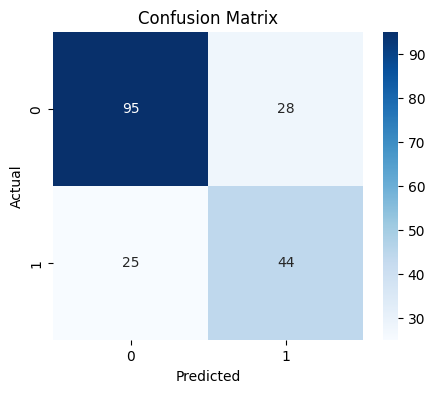

In [18]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Print results
print(f"Accuracy:    {accuracy:.2f}")
print(f"Precision:   {precision:.2f}")
print(f"Recall:      {recall:.2f}")
print(f"F1 Score:    {f1:.2f}")
print(f"Specificity: {specificity:.2f}")


Accuracy:    0.72
Precision:   0.61
Recall:      0.64
F1 Score:    0.62
Specificity: 0.77


Confusion Matrix:
[[95 28]
 [25 44]]

Accuracy    : 0.72
Precision   : 0.61
Recall      : 0.64
F1 Score    : 0.62
Specificity : 0.77


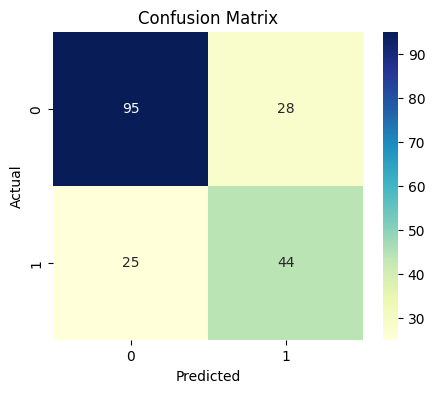

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and prepare data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Print metrics
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy    : {accuracy:.2f}")
print(f"Precision   : {precision:.2f}")
print(f"Recall      : {recall:.2f}")
print(f"F1 Score    : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== Sklearn Metrics ===
Confusion Matrix:
[[95 28]
 [25 44]]
Accuracy    : 0.72
Precision   : 0.61
Recall      : 0.64
F1 Score    : 0.62
Specificity : 0.77

=== Manual Metric Calculation (Formulas) ===
TP = 44, TN = 95, FP = 28, FN = 25
Accuracy    = (TP + TN) / (TP + TN + FP + FN) = (44 + 95) / (192) = 0.72
Precision   = TP / (TP + FP) = 44 / (72) = 0.61
Recall      = TP / (TP + FN) = 44 / (69) = 0.64
F1 Score    = 2 * (P * R) / (P + R) = 2 * (0.61 * 0.64) / (0.61 + 0.64) = 0.62
Specificity = TN / (TN + FP) = 95 / (123) = 0.77


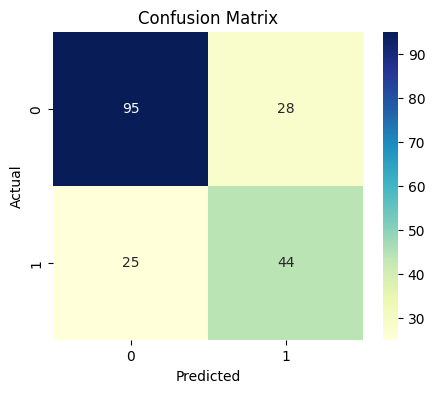

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load and prepare data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics using sklearn
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Print metrics from sklearn
print("=== Sklearn Metrics ===")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy    : {accuracy:.2f}")
print(f"Precision   : {precision:.2f}")
print(f"Recall      : {recall:.2f}")
print(f"F1 Score    : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")

# === Manual Metric Calculation ===
print("\n=== Manual Metric Calculation (Formulas) ===")
print(f"TP = {tp}, TN = {tn}, FP = {fp}, FN = {fn}")

# Manual calculations
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
precision_manual = tp / (tp + fp) if (tp + fp) != 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) != 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) != 0 else 0
specificity_manual = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"Accuracy    = (TP + TN) / (TP + TN + FP + FN) = ({tp} + {tn}) / ({tp + tn + fp + fn}) = {accuracy_manual:.2f}")
print(f"Precision   = TP / (TP + FP) = {tp} / ({tp + fp}) = {precision_manual:.2f}")
print(f"Recall      = TP / (TP + FN) = {tp} / ({tp + fn}) = {recall_manual:.2f}")
print(f"F1 Score    = 2 * (P * R) / (P + R) = 2 * ({precision_manual:.2f} * {recall_manual:.2f}) / ({precision_manual:.2f} + {recall_manual:.2f}) = {f1_manual:.2f}")
print(f"Specificity = TN / (TN + FP) = {tn} / ({tn + fp}) = {specificity_manual:.2f}")

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
